In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [41]:
# import data from file
df_road = pd.read_csv('data/demo_with_intersection.csv')

In [42]:
df_road.head()

,road,id,model_type,name,lat,lon,length,condition,road_lrp
0,N1,N1_0,sourcesink,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.0,NaN,N1LRPS
1,N1,N1_1,link,Km post missing,23.702139,90.451972,1.0,NaN,N1LRP001
2,N1,N1_2,bridge,.,23.698739,90.458861,0.8,A,N1LRP001a
3,N1,N1_3,link,Km post missing,23.697889,90.460583,0.2,NaN,N1LRP002
4,N1,N1_4,link,Km post missing,23.693833,90.469138,1.0,NaN,N1LRP003


In [43]:
roads= df_road['road'].unique()

for road in roads:
    print(road)

N1
N102
N104
N105
N106
N2
N204
N207
N208


In [44]:
# create the dataframe for the road only contains N1
road_N1 = df_road[df_road['road'] == 'N1']

In [45]:
# create the dataframe for the road only contains both N1 and N102
road_N1_N102 = df_road[df_road['road'].isin(['N1', 'N102'])]

In [46]:
driving_distance = []

In [47]:
def find_shortest_path_from_sourcesink(df, source, sink, path_color='red'):
    """
    Finds and visualizes the shortest path between two specified 'sourcesink' nodes in a given road network.
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Check if the provided source and sink are valid
    if source not in G.nodes or sink not in G.nodes:
        print("Invalid source or sink node.")
        return

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the shortest path only
    plt.figure(figsize=(10, 7))
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw(G, pos, nodelist=shortest_path, edgelist=path_edges, node_color='orange', edge_color=path_color, node_size=50, width=2, with_labels=False, font_size=8)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")

    path_distance = nx.shortest_path_length(G, source, sink, weight='weight')
    print(f"Path distance list: {path_distance}")


In [49]:
df_sourcesink = df_road[df_road.model_type == 'sourcesink'].copy()

Number of nodes:  2715
Number of edges:  2719


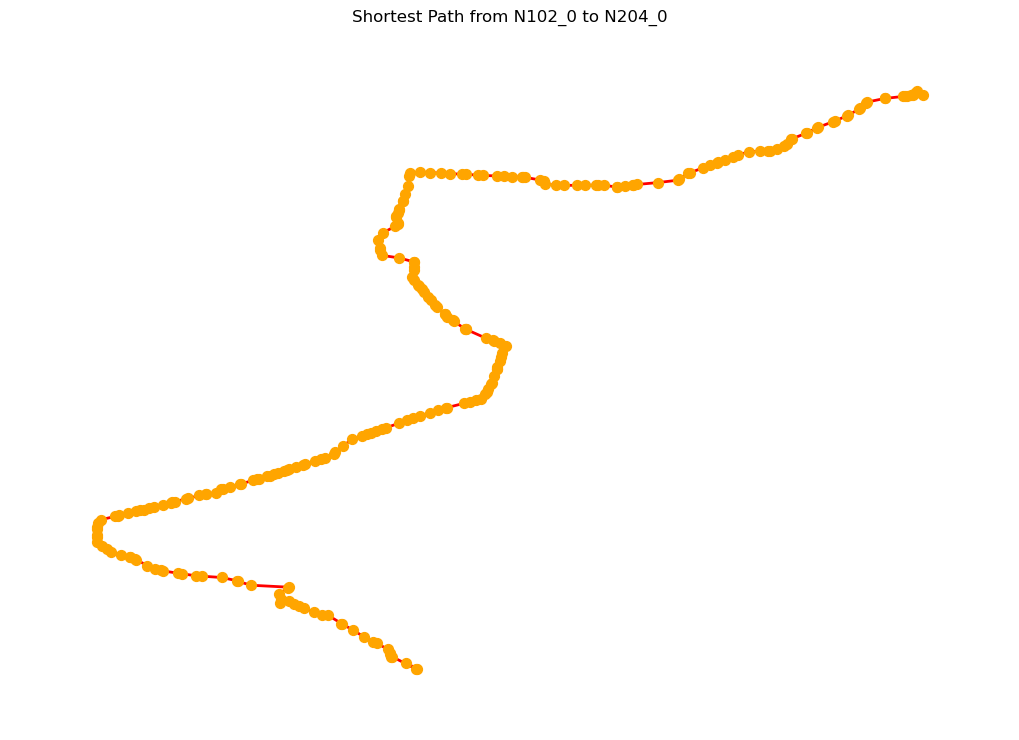

Shortest path from N102_0 to N204_0: ['N102_0', 'N102_1', 'N1_148N102_2', 'N102_3', 'N102_4', 'N102_5', 'N102_6', 'N102_7', 'N102_8', 'N102_9', 'N102_10', 'N102_11', 'N102_12', 'N102_13', 'N102_14', 'N102_15', 'N102_16', 'N102_17', 'N102_18', 'N102_19', 'N102_20', 'N102_21', 'N102_22', 'N102_23', 'N102_24', 'N102_25', 'N102_26', 'N102_27', 'N102_28', 'N102_29', 'N102_30', 'N102_31', 'N102_32', 'N102_33', 'N102_34', 'N102_35', 'N102_36', 'N102_37', 'N102_38', 'N102_39', 'N102_40', 'N102_41', 'N102_42', 'N102_43', 'N102_44', 'N102_45', 'N102_46', 'N102_47', 'N102_48', 'N102_49', 'N102_50', 'N102_51', 'N102_52', 'N102_53', 'N102_54', 'N102_55', 'N102_56', 'N102_57', 'N102_58', 'N102_59', 'N102_60', 'N102_61', 'N102_62', 'N102_63', 'N102_64', 'N102_65', 'N102_66', 'N102_67', 'N102_68', 'N102_69', 'N102_70', 'N102_71', 'N102_72', 'N102_73', 'N102_74', 'N102_75', 'N102_76', 'N102_77', 'N102_78', 'N102_79', 'N102_80', 'N102_81', 'N102_82', 'N102_83', 'N102_84', 'N102_85', 'N102_86', 'N102_87'

In [48]:
find_shortest_path_from_sourcesink(df_road, 'N102_0', 'N204_0')

Number of nodes:  1087
Number of edges:  1086
Sourcesink nodes:  ['N1_0', 'N1_1086']
Source node: N1_0, Sink node: N1_1086


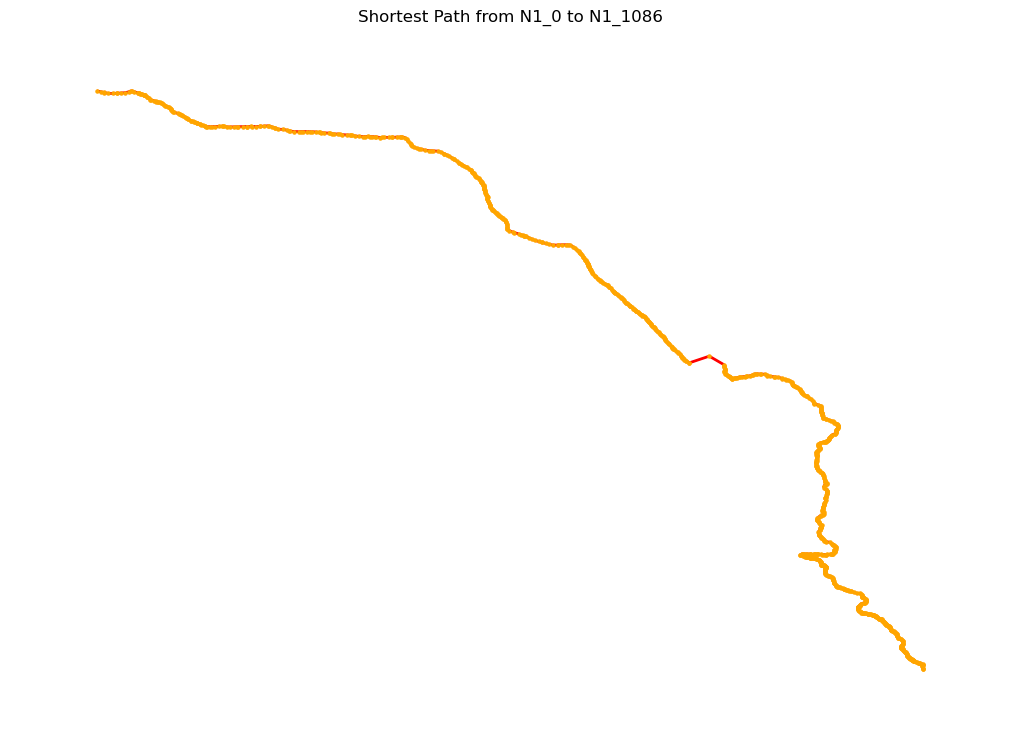

Shortest path from N1_0 to N1_1086: ['N1_0', 'N1_1', 'N1_2', 'N1_3', 'N1_4', 'N1_5', 'N1_6', 'N1_7', 'N1_8', 'N1_9', 'N1_10', 'N2_1N1_11', 'N1_12', 'N1_13', 'N1_14', 'N1_15', 'N1_16', 'N1_17', 'N1_18', 'N1_19N105_2', 'N1_20', 'N1_21', 'N1_22', 'N1_23', 'N1_24', 'N1_25', 'N1_26', 'N1_27', 'N1_28', 'N1_29', 'N1_30', 'N1_31', 'N1_32', 'N1_33', 'N1_34', 'N1_35', 'N1_36', 'N1_37', 'N1_38', 'N1_39', 'N1_40', 'N1_41', 'N1_42', 'N1_43', 'N1_44', 'N1_45', 'N1_46', 'N1_47', 'N1_48', 'N1_49', 'N1_50', 'N1_51', 'N1_52', 'N1_53', 'N1_54', 'N1_55', 'N1_56', 'N1_57', 'N1_58', 'N1_59', 'N1_60', 'N1_61', 'N1_62', 'N1_63', 'N1_64', 'N1_65', 'N1_66', 'N1_67', 'N1_68', 'N1_69', 'N1_70', 'N1_71', 'N1_72', 'N1_73', 'N1_74', 'N1_75', 'N1_76', 'N1_77', 'N1_78', 'N1_79', 'N1_80', 'N1_81', 'N1_82', 'N1_83', 'N1_84', 'N1_85', 'N1_86', 'N1_87', 'N1_88', 'N1_89', 'N1_90', 'N1_91', 'N1_92', 'N1_93', 'N1_94', 'N1_95', 'N1_96', 'N1_97', 'N1_98', 'N1_99', 'N1_100', 'N1_101', 'N1_102', 'N1_103', 'N1_104', 'N1_105', 'N1

In [11]:
find_shortest_path_from_sourcesink(road_N1)

Number of nodes:  2715
Number of edges:  2719
Sourcesink nodes:  ['N1_0', 'N1_1086', 'N102_0', 'N102_173', 'N104_0', 'N104_90', 'N105_0', 'N105_92', 'N106_0', 'N106_173', 'N2_0', 'N2_751', 'N204_0', 'N204_69', 'N207_0', 'N207_136', 'N208_0', 'N208_149']
Source node: N2_751, Sink node: N207_0


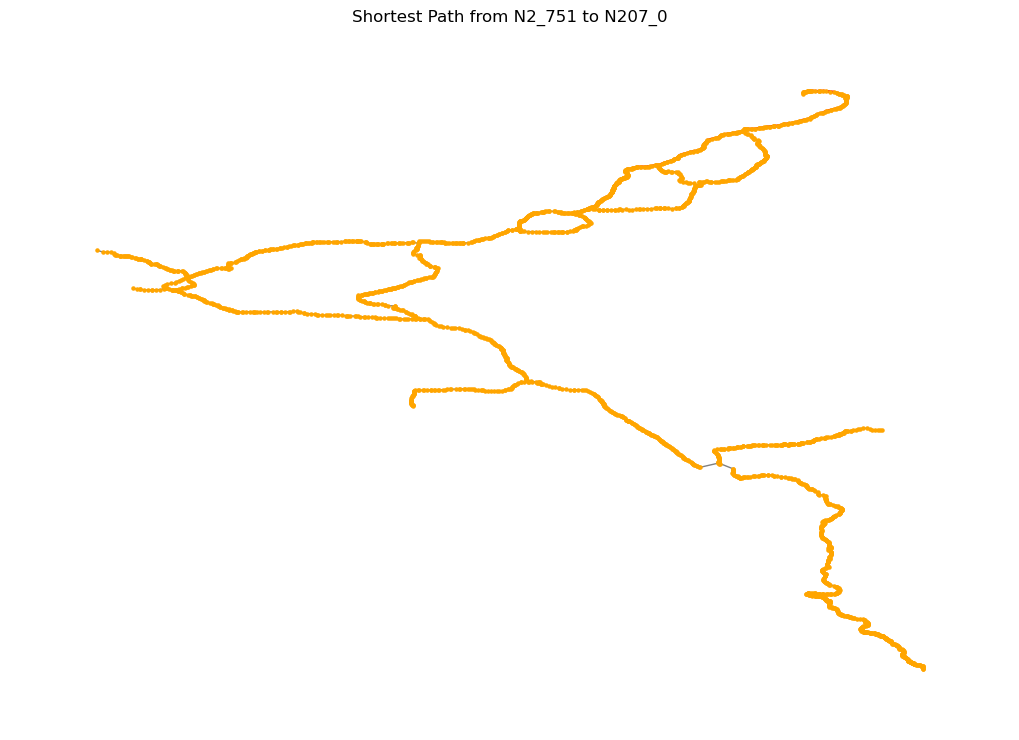

Shortest path from N2_751 to N207_0: ['N2_751', 'N2_750', 'N2_749', 'N2_748', 'N2_747', 'N2_746', 'N2_745', 'N2_744', 'N2_743', 'N2_742', 'N2_741', 'N2_740', 'N2_739', 'N2_738', 'N2_737', 'N2_736', 'N2_735', 'N2_734', 'N2_733', 'N2_732', 'N2_731', 'N2_730', 'N2_729', 'N2_728', 'N2_727', 'N2_726', 'N2_725', 'N2_724', 'N2_723', 'N2_722', 'N2_721', 'N2_720', 'N2_719', 'N2_718', 'N2_717', 'N2_716', 'N2_715', 'N2_714', 'N2_713', 'N2_712', 'N2_711', 'N2_710', 'N2_709', 'N2_708', 'N2_707', 'N2_706', 'N2_705', 'N2_704', 'N2_703', 'N2_702', 'N2_701', 'N2_700', 'N2_699', 'N2_698', 'N2_697', 'N2_696', 'N2_695', 'N2_694', 'N2_693', 'N2_692', 'N2_691', 'N2_690', 'N2_689', 'N2_688', 'N2_687', 'N2_686', 'N2_685', 'N2_684', 'N2_683', 'N2_682', 'N2_681', 'N2_680', 'N2_679', 'N2_678', 'N2_677', 'N2_676', 'N2_675', 'N2_674', 'N2_673', 'N2_672', 'N2_671', 'N2_670', 'N2_669', 'N2_668', 'N2_667', 'N2_666', 'N2_665', 'N2_664', 'N2_663', 'N2_662', 'N2_661', 'N2_660', 'N2_659', 'N2_658', 'N2_657', 'N2_656', 'N

In [12]:
find_shortest_path_from_sourcesink(df_road)

Number of nodes:  2715
Number of edges:  2719
Sourcesink nodes:  ['N1_0', 'N1_1086', 'N102_0', 'N102_173', 'N104_0', 'N104_90', 'N105_0', 'N105_92', 'N106_0', 'N106_173', 'N2_0', 'N2_751', 'N204_0', 'N204_69', 'N207_0', 'N207_136', 'N208_0', 'N208_149']
Source node: N102_173, Sink node: N106_0


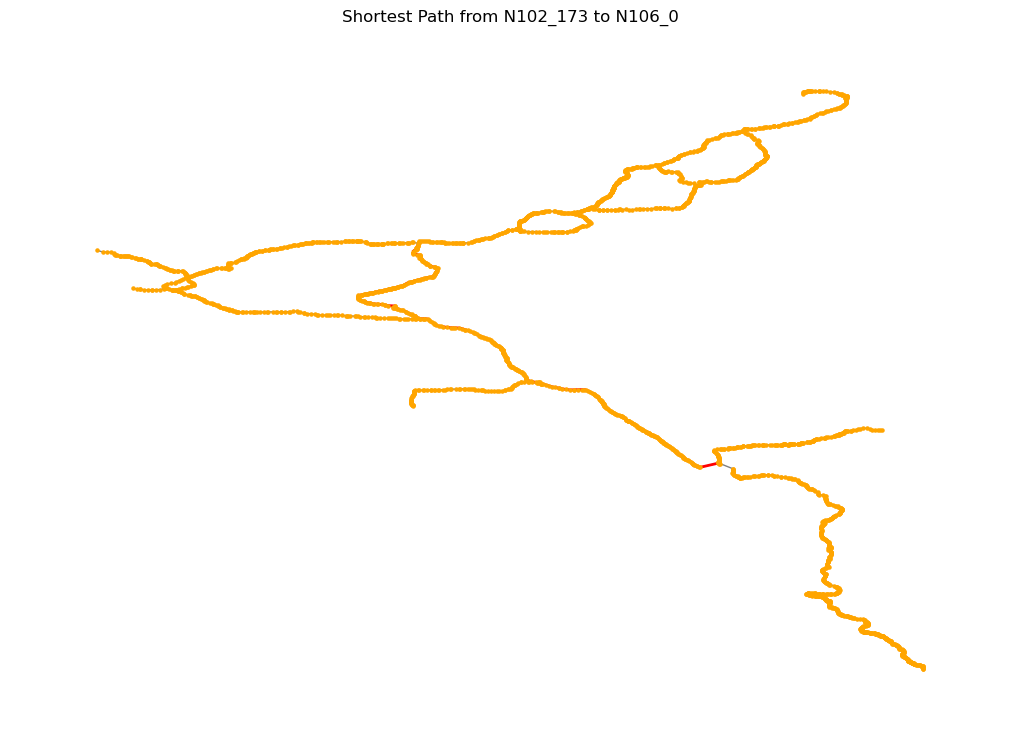

Shortest path from N102_173 to N106_0: ['N102_173', 'N102_172', 'N102_171N2_192', 'N102_170', 'N102_169', 'N102_168', 'N102_167', 'N102_166', 'N102_165', 'N102_164', 'N102_163', 'N102_162', 'N102_161', 'N102_160', 'N102_159', 'N102_158', 'N102_157', 'N102_156', 'N102_155', 'N102_154', 'N102_153', 'N102_152', 'N102_151', 'N102_150', 'N102_149', 'N102_148', 'N102_147', 'N102_146', 'N102_145', 'N102_144', 'N102_143', 'N102_142', 'N102_141', 'N102_140', 'N102_139', 'N102_138', 'N102_137', 'N102_136', 'N102_135', 'N102_134', 'N102_133', 'N102_132', 'N102_131', 'N102_130', 'N102_129', 'N102_128', 'N102_127', 'N102_126', 'N102_125', 'N102_124', 'N102_123', 'N102_122', 'N102_121', 'N102_120', 'N102_119', 'N102_118', 'N102_117', 'N102_116', 'N102_115', 'N102_114', 'N102_113', 'N102_112', 'N102_111', 'N102_110', 'N102_109', 'N102_108', 'N102_107', 'N102_106', 'N102_105', 'N102_104', 'N102_103', 'N102_102', 'N102_101', 'N102_100', 'N102_99', 'N102_98', 'N102_97', 'N102_96', 'N102_95', 'N102_94', 

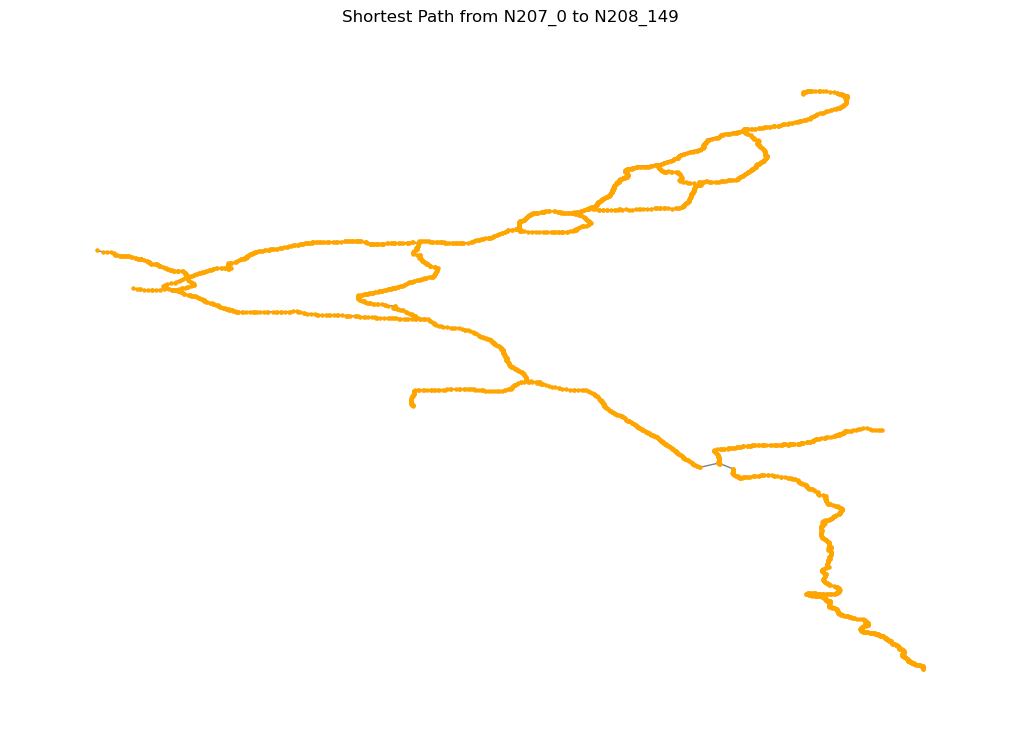

Shortest path from N207_0 to N208_149: ['N207_0', 'N207_1', 'N2_359N207_2', 'N2_360', 'N2_361', 'N2_362', 'N2_363', 'N2_364', 'N2_365', 'N2_366', 'N2_367', 'N2_368', 'N2_369', 'N2_370', 'N2_371', 'N2_372', 'N2_373', 'N2_374', 'N2_375', 'N2_376', 'N2_377', 'N2_378', 'N2_379', 'N2_380', 'N2_381', 'N2_382', 'N2_383', 'N2_384', 'N2_385', 'N2_386', 'N2_387', 'N2_388', 'N2_389', 'N2_390', 'N2_391', 'N2_392', 'N2_393', 'N2_394', 'N2_395', 'N2_396', 'N2_397', 'N2_398', 'N2_399', 'N2_400', 'N2_401', 'N2_402', 'N2_403', 'N2_404', 'N2_405', 'N2_406', 'N2_407', 'N2_408', 'N2_409', 'N2_410', 'N2_411', 'N2_412', 'N2_413', 'N2_414', 'N2_415', 'N2_416', 'N2_417', 'N2_418', 'N2_419', 'N2_420', 'N2_421', 'N2_422', 'N2_423', 'N2_424', 'N2_425', 'N2_426', 'N2_427', 'N2_428', 'N2_429', 'N2_430', 'N2_431', 'N2_432', 'N2_433', 'N2_434', 'N2_435', 'N2_436', 'N2_437', 'N2_438', 'N2_439', 'N2_440', 'N2_441', 'N2_442', 'N2_443', 'N2_444', 'N2_445', 'N2_446', 'N2_447', 'N2_448', 'N2_449', 'N2_450', 'N2_451', 'N2_

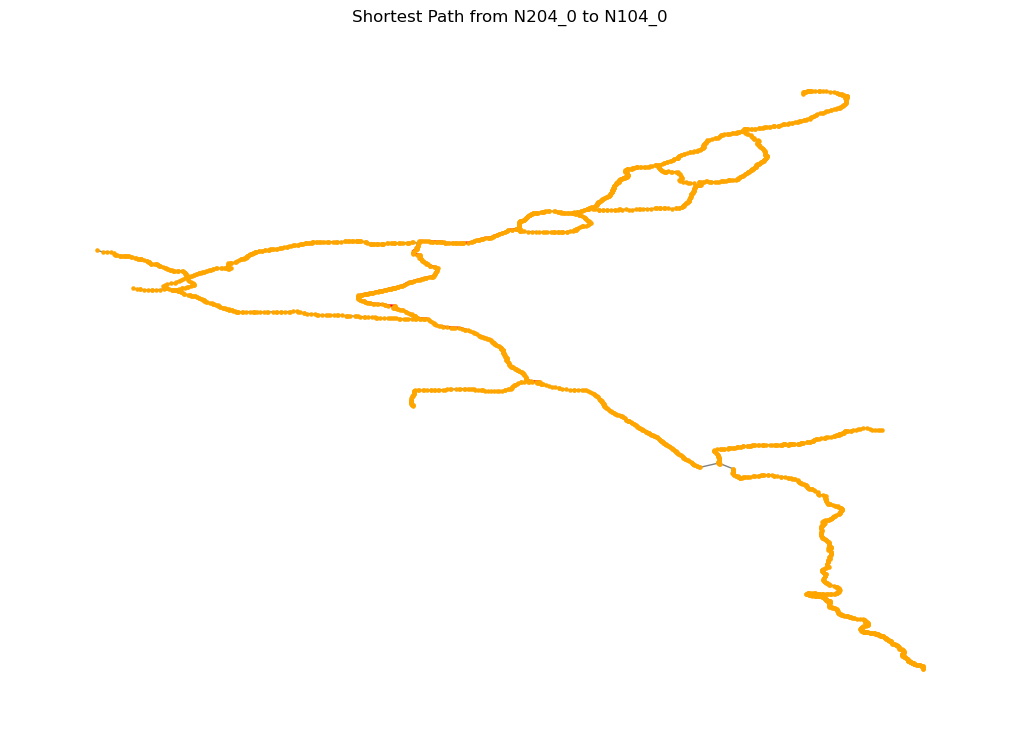

Shortest path from N204_0 to N104_0: ['N204_0', 'N204_1', 'N2_265N204_2', 'N2_264', 'N2_263', 'N2_262', 'N2_261', 'N2_260', 'N2_259', 'N2_258', 'N2_257', 'N2_256', 'N2_255', 'N2_254', 'N2_253', 'N2_252', 'N2_251', 'N2_250', 'N2_249', 'N2_248', 'N2_247', 'N2_246', 'N2_245', 'N2_244', 'N2_243', 'N2_242', 'N2_241', 'N2_240', 'N2_239', 'N2_238', 'N2_237', 'N2_236', 'N2_235', 'N2_234', 'N2_233', 'N2_232', 'N2_231', 'N2_230', 'N2_229', 'N2_228', 'N2_227', 'N2_226', 'N2_225', 'N2_224', 'N2_223', 'N2_222', 'N2_221', 'N2_220', 'N2_219', 'N2_218', 'N2_217', 'N2_216', 'N2_215', 'N2_214', 'N2_213', 'N2_212', 'N2_211', 'N2_210', 'N2_209', 'N2_208', 'N2_207', 'N2_206', 'N2_205', 'N2_204', 'N2_203', 'N2_202', 'N2_201', 'N2_200', 'N2_199', 'N2_198', 'N2_197', 'N2_196', 'N2_195', 'N2_194', 'N2_193', 'N102_171N2_192', 'N102_170', 'N102_169', 'N102_168', 'N102_167', 'N102_166', 'N102_165', 'N102_164', 'N102_163', 'N102_162', 'N102_161', 'N102_160', 'N102_159', 'N102_158', 'N102_157', 'N102_156', 'N102_15

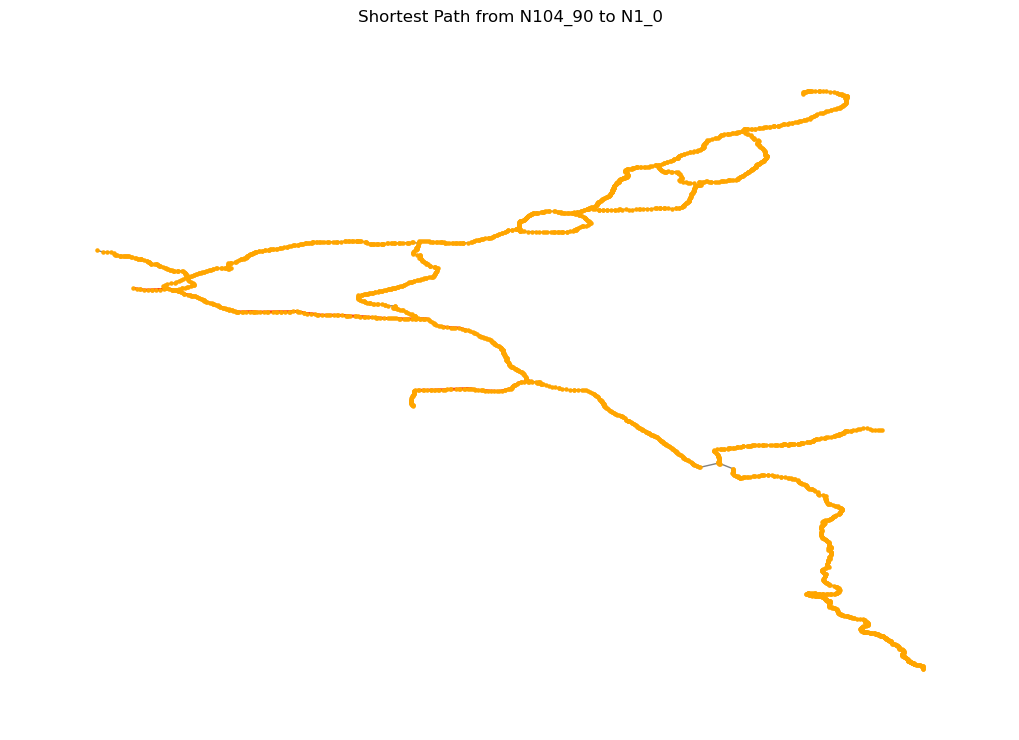

Shortest path from N104_90 to N1_0: ['N104_90', 'N104_89', 'N104_88', 'N104_87', 'N104_86', 'N104_85', 'N104_84', 'N104_83', 'N104_82', 'N104_81', 'N104_80', 'N104_79', 'N104_78', 'N104_77', 'N104_76', 'N104_75', 'N104_74', 'N104_73', 'N104_72', 'N104_71', 'N104_70', 'N104_69', 'N104_68', 'N104_67', 'N104_66', 'N104_65', 'N104_64', 'N104_63', 'N104_62', 'N104_61', 'N104_60', 'N104_59', 'N104_58', 'N104_57', 'N104_56', 'N104_55', 'N104_54', 'N104_53', 'N104_52', 'N104_51', 'N104_50', 'N104_49', 'N104_48', 'N104_47', 'N104_46', 'N104_45', 'N104_44', 'N104_43', 'N104_42', 'N104_41', 'N104_40', 'N104_39', 'N104_38', 'N104_37', 'N104_36', 'N104_35', 'N104_34', 'N104_33', 'N104_32', 'N104_31', 'N104_30', 'N104_29', 'N104_28', 'N104_27', 'N104_26', 'N104_25', 'N104_24', 'N104_23', 'N104_22', 'N104_21', 'N104_20', 'N104_19', 'N104_18', 'N104_17', 'N104_16', 'N104_15', 'N104_14', 'N104_13', 'N104_12', 'N104_11', 'N104_10', 'N104_9', 'N104_8', 'N104_7', 'N104_6', 'N104_5', 'N104_4N1_265', 'N1_26

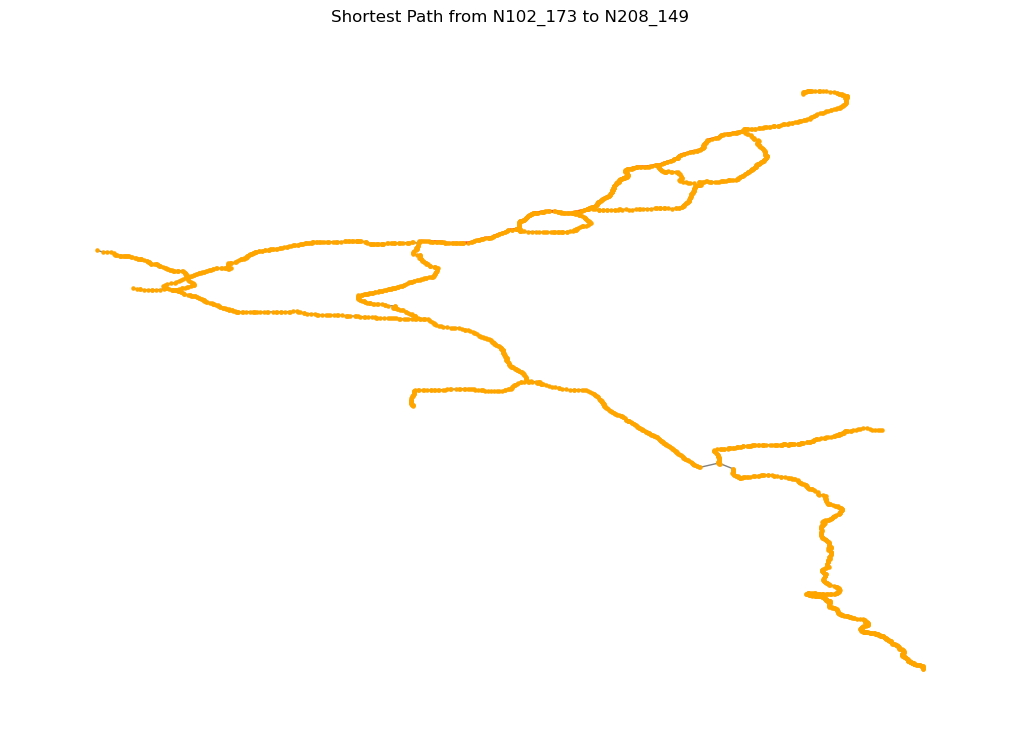

Shortest path from N102_173 to N208_149: ['N102_173', 'N102_172', 'N102_171N2_192', 'N2_193', 'N2_194', 'N2_195', 'N2_196', 'N2_197', 'N2_198', 'N2_199', 'N2_200', 'N2_201', 'N2_202', 'N2_203', 'N2_204', 'N2_205', 'N2_206', 'N2_207', 'N2_208', 'N2_209', 'N2_210', 'N2_211', 'N2_212', 'N2_213', 'N2_214', 'N2_215', 'N2_216', 'N2_217', 'N2_218', 'N2_219', 'N2_220', 'N2_221', 'N2_222', 'N2_223', 'N2_224', 'N2_225', 'N2_226', 'N2_227', 'N2_228', 'N2_229', 'N2_230', 'N2_231', 'N2_232', 'N2_233', 'N2_234', 'N2_235', 'N2_236', 'N2_237', 'N2_238', 'N2_239', 'N2_240', 'N2_241', 'N2_242', 'N2_243', 'N2_244', 'N2_245', 'N2_246', 'N2_247', 'N2_248', 'N2_249', 'N2_250', 'N2_251', 'N2_252', 'N2_253', 'N2_254', 'N2_255', 'N2_256', 'N2_257', 'N2_258', 'N2_259', 'N2_260', 'N2_261', 'N2_262', 'N2_263', 'N2_264', 'N2_265N204_2', 'N2_266', 'N2_267', 'N2_268', 'N2_269', 'N2_270', 'N2_271', 'N2_272', 'N2_273', 'N2_274', 'N2_275', 'N2_276', 'N2_277', 'N2_278', 'N2_279', 'N2_280', 'N2_281', 'N2_282', 'N2_283', 

In [13]:
for i in range(5):
    find_shortest_path_from_sourcesink(df_road)
